# Business Analytics Assignment
## Kaggle WiDS dataset
#### Submitted by 
#### G Likith Chandra 21020845001
#### & Sachin S 21020845014

# Objective
To predict building energy usage, using given building information and other related georaphical and climatic factors. The dataframe inculdes information about the monthly min, max and avg temperatures, year of construction of building, the type of facility, snow levels, precipitaion, wind directions, days with fog, heating days and cooling days. 
Given the information, we will be performing an EDA to undertand the training data and further clean the dataset for missing values. Next, we will be performing Linear Regression to identify the significant variables which will predict the Site Energy Utilisation Index in the test data set.

---

### Running neccessary libraries

In [1]:
library(dplyr)
library(ggcorrplot)
library(DataExplorer)
library(car)
library(vtreat)
library(janitor)
library(tidyr)
options(warn=0)

Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'ggcorrplot' was built under R version 3.6.3"Loading required package: ggplot2
Warning message:
"package 'DataExplorer' was built under R version 3.6.3"Loading required package: carData

Attaching package: 'car'

The following object is masked from 'package:dplyr':

    recode

Loading required package: wrapr

Attaching package: 'wrapr'

The following object is masked from 'package:car':

    bc

The following object is masked from 'package:dplyr':

    coalesce

Warning message:
"package 'janitor' was built under R version 3.6.3"
Attaching package: 'janitor'

The following objects are masked from 'package:stats':

    chisq.test, fisher.test

Warning message:
"package 'tidyr' was built under R versio

### Importing the training dataset into the working environment.

In [3]:
df<- read.csv("train.csv",stringsAsFactors = TRUE)

### Analysing dataframe structure and summary statistics

In [4]:
str(df)

'data.frame':	75757 obs. of  64 variables:
 $ Year_Factor              : int  1 1 1 1 1 1 1 1 1 1 ...
 $ State_Factor             : Factor w/ 7 levels "State_1","State_10",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ building_class           : Factor w/ 2 levels "Commercial","Residential": 1 1 1 1 1 1 1 1 1 1 ...
 $ facility_type            : Factor w/ 60 levels "2to4_Unit_Building",..: 14 56 49 7 57 59 57 57 33 33 ...
 $ floor_area               : num  61242 274000 280025 55325 66000 ...
 $ year_built               : num  1942 1955 1951 1980 1985 ...
 $ energy_star_rating       : num  11 45 97 46 100 NA 56 99 98 83 ...
 $ ELEVATION                : num  2.4 1.8 1.8 1.8 2.4 2.4 2.4 2.4 2.4 2.4 ...
 $ january_min_temp         : int  36 36 36 36 36 36 36 36 36 36 ...
 $ january_avg_temp         : num  50.5 50.5 50.5 50.5 50.5 50.5 50.5 50.5 50.5 50.5 ...
 $ january_max_temp         : int  68 68 68 68 68 68 68 68 68 68 ...
 $ february_min_temp        : int  35 35 35 35 35 35 35 35 35 35 ...
 $ february

In [5]:
summary(df)

  Year_Factor      State_Factor       building_class 
 Min.   :1.000   State_1 : 5618   Commercial :32199  
 1st Qu.:3.000   State_10:   15   Residential:43558  
 Median :5.000   State_11: 6412                      
 Mean   :4.368   State_2 : 4871                      
 3rd Qu.:6.000   State_4 : 4300                      
 Max.   :6.000   State_6 :50840                      
                 State_8 : 3701                      
                   facility_type     floor_area        year_built  
 Multifamily_Uncategorized:39455   Min.   :    943   Min.   :   0  
 Office_Uncategorized     :12512   1st Qu.:  62379   1st Qu.:1927  
 Education_Other_classroom: 3860   Median :  91367   Median :1951  
 Lodging_Hotel            : 2098   Mean   : 165984   Mean   :1952  
 2to4_Unit_Building       : 1893   3rd Qu.: 166000   3rd Qu.:1977  
 Commercial_Other         : 1744   Max.   :6385382   Max.   :2015  
 (Other)                  :14195                     NA's   :1837  
 energy_star_rating   EL

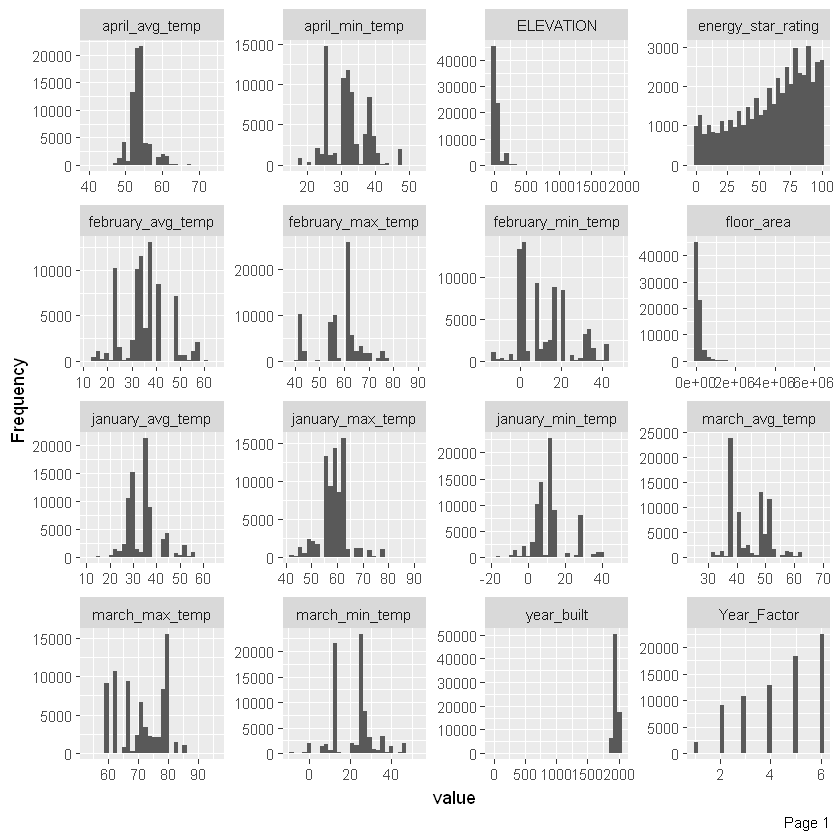

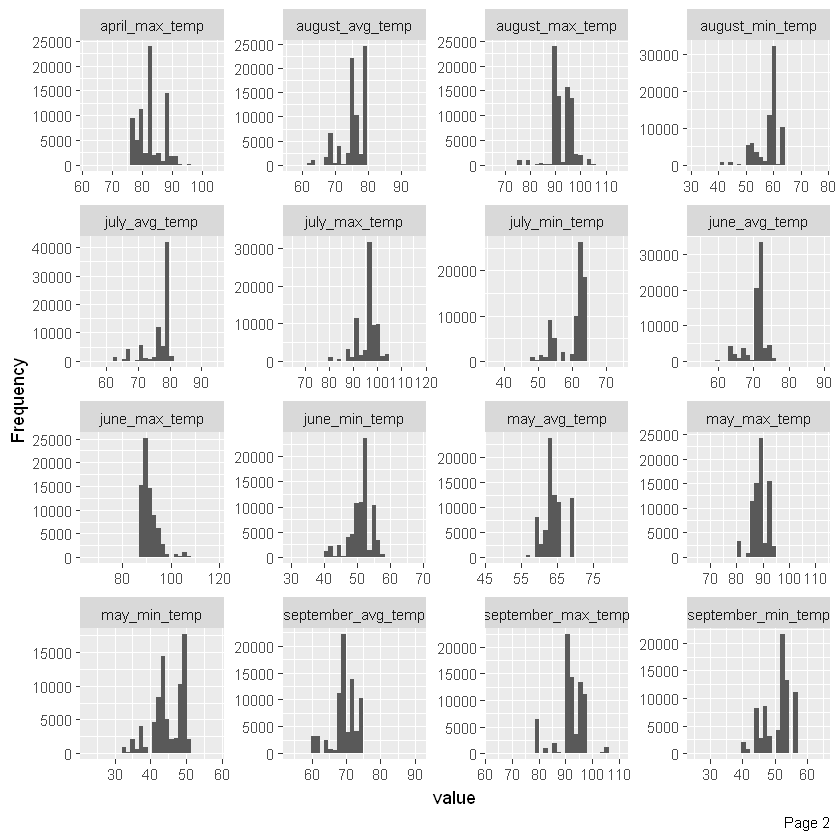

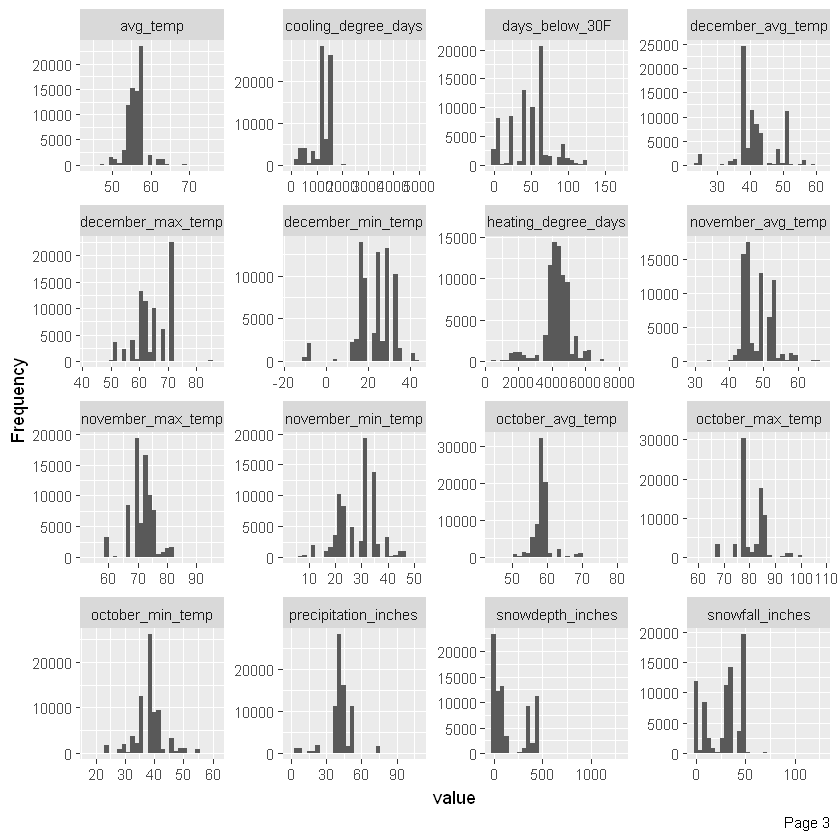

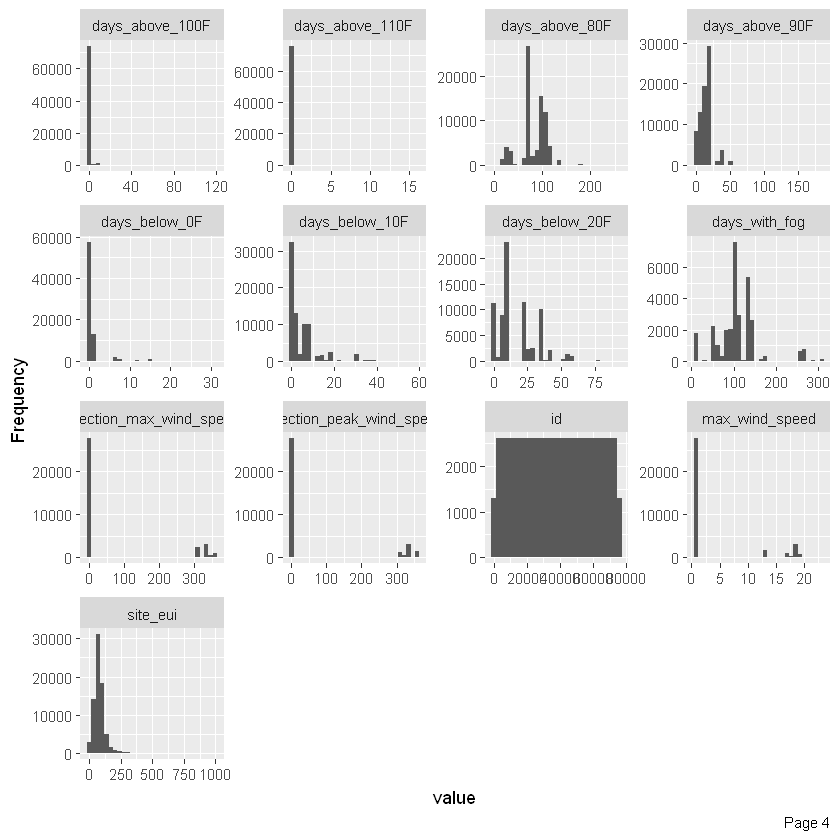

In [6]:
plot_histogram(df)

Elevation and floor_area being highly positively skewed.
Energy_star_rating is negatively skewed with mean less than median and most of the values lie between 60-100.
Significant 30% of the buildings have year_built between 1950-1970 and more than 80% fall under 20th century which shows that most of the buildings are very old. It would be interesting to see if there is any trend on energy usage wrt building age.
There is no significant pattern or distribution in the temperature variables and days below_temp variables.
Site_eui has values ranging from 1 to 997, with 75% values less than equal to 97 and one-third values between 70 to 97.

### Checking missing values in the given column attributes

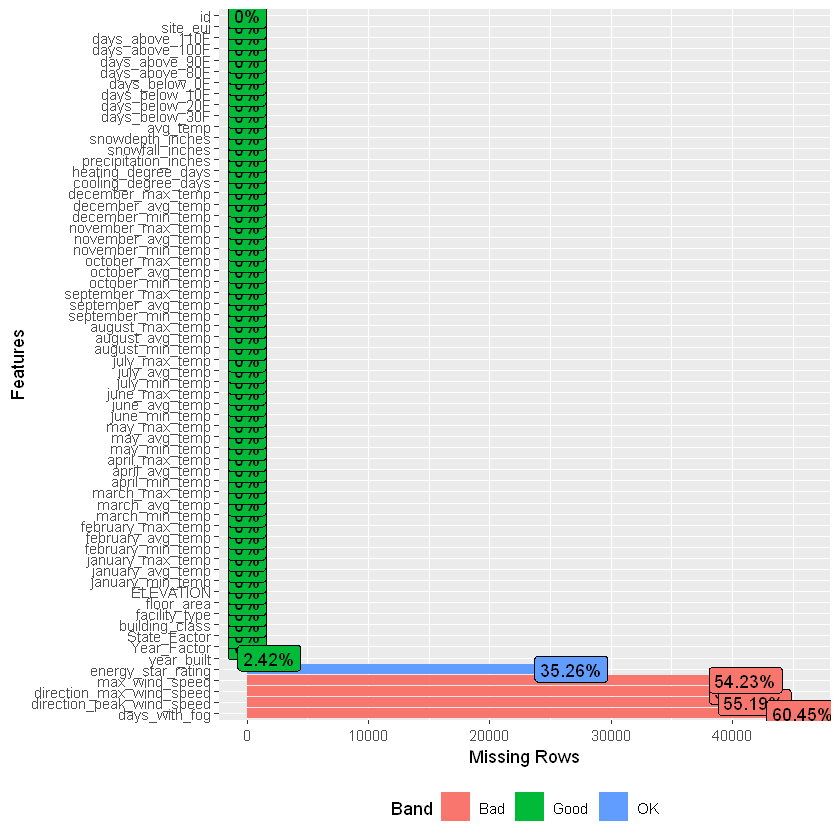

In [7]:
plot_missing(df)

### Creating new data frame for analysing only numerical variables

In [8]:
df_num<-df %>% select_if(is.numeric)

### Checking variables with very high correlations

In [9]:
#Checking collinearity or relationship between similar variables
z <- cor(df_num)
zdf <- as.data.frame(as.table(z))
zdf1 <- subset(zdf, abs(Freq) > 0.88)
subset(zdf1, abs(Freq) <1)

,Var1,Var2,Freq
312,january_avg_temp,january_min_temp,0.9711487
348,heating_degree_days,january_min_temp,-0.8909047
372,january_min_temp,january_avg_temp,0.9711487
376,february_avg_temp,january_avg_temp,0.9112279
378,march_min_temp,january_avg_temp,0.9075873
409,heating_degree_days,january_avg_temp,-0.9073663
414,days_below_30F,january_avg_temp,-0.8900949
556,january_avg_temp,february_avg_temp,0.9112279
561,march_min_temp,february_avg_temp,0.9008912
562,march_avg_temp,february_avg_temp,0.8875162


Clearly, most of the monthly temp_ variables, heating_degree_days and days_below_ variables are highly correlated.
So there is a need to remove most of these redundant information going forward.

## Correlation Analysis

Firstly we will create a subset of numerical dataframe that we created earlier by excluding the redundant variables and the variables with NA values. And create a correlation matrix for the subset dataframe created.

Secondly we will create another dataframe where we will keep the variables with NA values but remove all the rows with NA values. And create a correaltion matrix for the dataframe created.

Then we will compare for the correlation stats, to define the influentional variables and how removing the NA values is impacting the correlation for rest of the variables in the remaining dataset.

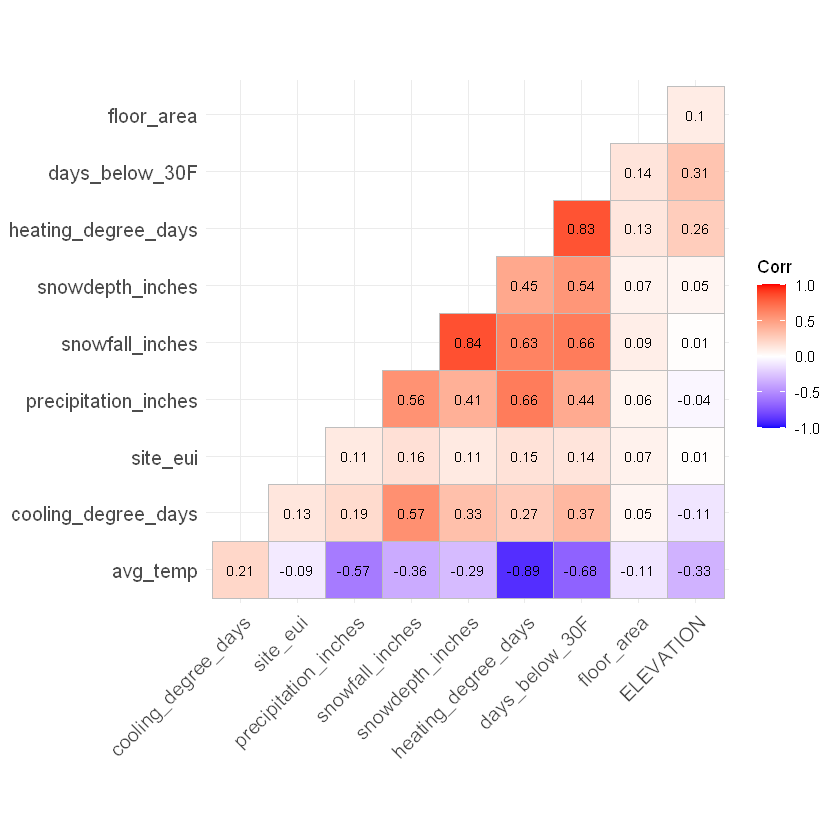

In [10]:
df_num1 <- select(df_num, site_eui,floor_area,ELEVATION,avg_temp,
                  precipitation_inches,snowfall_inches,snowdepth_inches,
                  cooling_degree_days,heating_degree_days,days_below_30F)

ggcorrplot(cor(df_num1), hc.order=TRUE,type="lower",p.mat=cor_pmat(df_num1),insig="blank",lab="TRUE", lab_size=3)

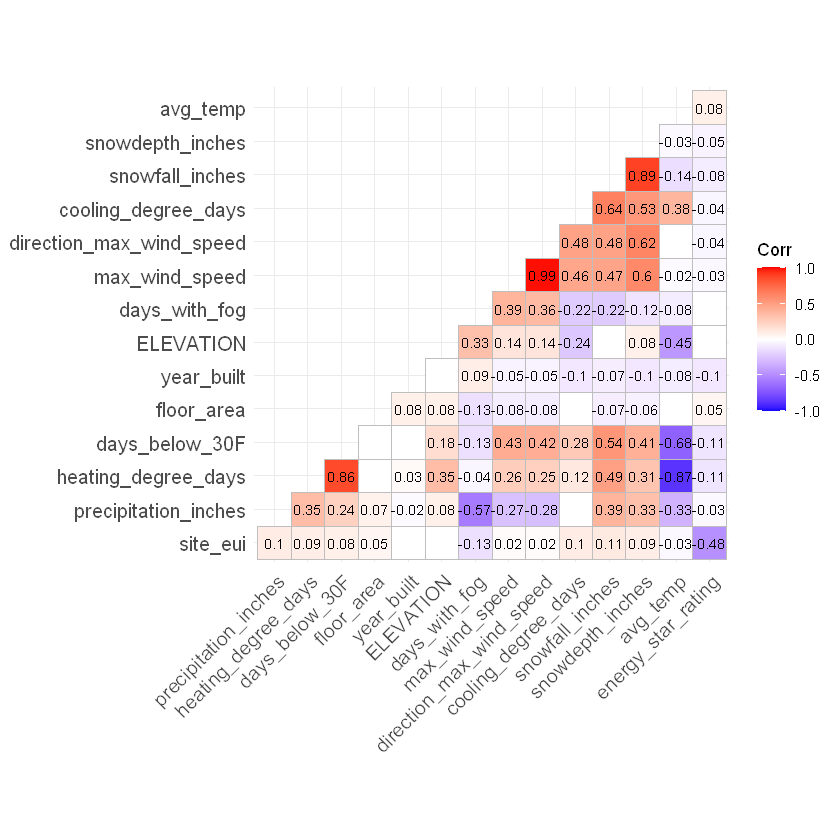

In [11]:
df_num_omit <- na.omit(df_num)

df_num2 <- select(df_num_omit, site_eui,floor_area,ELEVATION,avg_temp,
                  precipitation_inches,snowfall_inches,snowdepth_inches,
                  cooling_degree_days,heating_degree_days,days_below_30F,
                 energy_star_rating,max_wind_speed,days_with_fog,
                  direction_max_wind_speed,year_built)

ggcorrplot(cor(df_num2), hc.order=TRUE,type="lower",p.mat=cor_pmat(df_num2),insig="blank",lab="TRUE", lab_size=3)

Important variables having relatively higher coefficients as per coefficient matrix include energy_star_rating,precipitation_inches,snowfall_inches,cooling_degree_days,heating_degree_days and days_below_30F.
Omitting NA values has reduced significant amount of data further weakening the correlation factor of other variables wrt site_eui. Also energy_star_rating being a highly correlated factor to site_eui, as compared to others there is a need to fill its missing values, for more efficient predictive model, going forward.

### Correlation Analaysis separately for Commercial and Residential building class

We tried to analyse the correlation of other variables wrt site_eui seperately for commercial and residential building class data. No significant difference in correlation coefficients could be found.

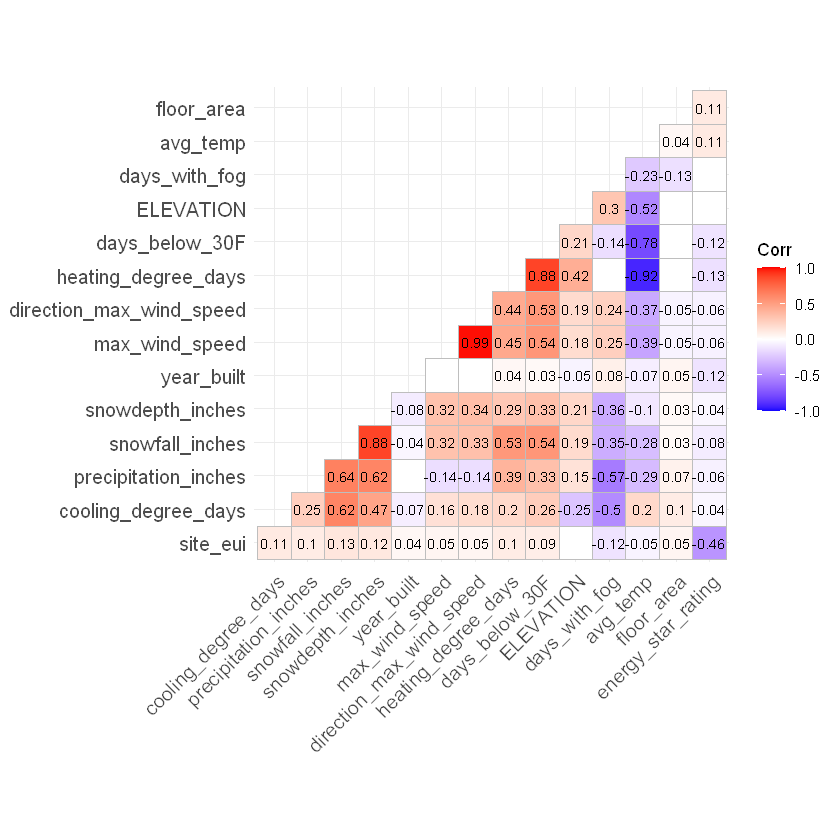

In [12]:
df_com <- filter(df, building_class == "Commercial")
df_num_com<-df_com %>% select_if(is.numeric)
df_num_omit_com <- na.omit(df_num_com)

df_num_corr <- select(df_num_omit_com, site_eui,floor_area,ELEVATION,avg_temp,
                  precipitation_inches,snowfall_inches,snowdepth_inches,
                  cooling_degree_days,heating_degree_days,days_below_30F,
                 energy_star_rating,max_wind_speed,days_with_fog,
                      direction_max_wind_speed,year_built)

ggcorrplot(cor(df_num_corr), hc.order=TRUE,type="lower",p.mat=cor_pmat(df_num_corr),insig="blank",lab="TRUE", lab_size=3)

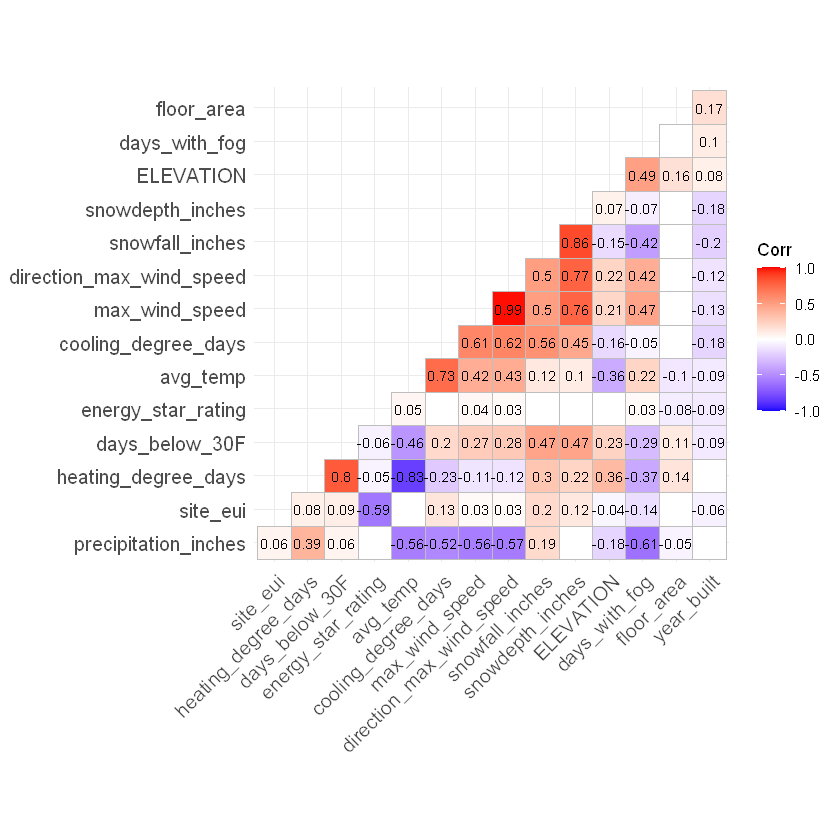

In [13]:
df_res <- filter(df, building_class == "Residential")
df_num_res<-df_res %>% select_if(is.numeric)
df_num_omit_res <- na.omit(df_num_res)

df_num_corr1 <- select(df_num_omit_res, site_eui,floor_area,ELEVATION,avg_temp,
                  precipitation_inches,snowfall_inches,snowdepth_inches,
                  cooling_degree_days,heating_degree_days,days_below_30F,
                 energy_star_rating,max_wind_speed,days_with_fog,
                       direction_max_wind_speed,year_built)

ggcorrplot(cor(df_num_corr1), hc.order=TRUE,type="lower",p.mat=cor_pmat(df_num_corr1),insig="blank",lab="TRUE", lab_size=3)

Below correlation plot shows that none of the variables have a clear linear correlation with site_eui. Linear correlation is visible in case of variables of similar nature only, like avg_temp and heating_degree_days.

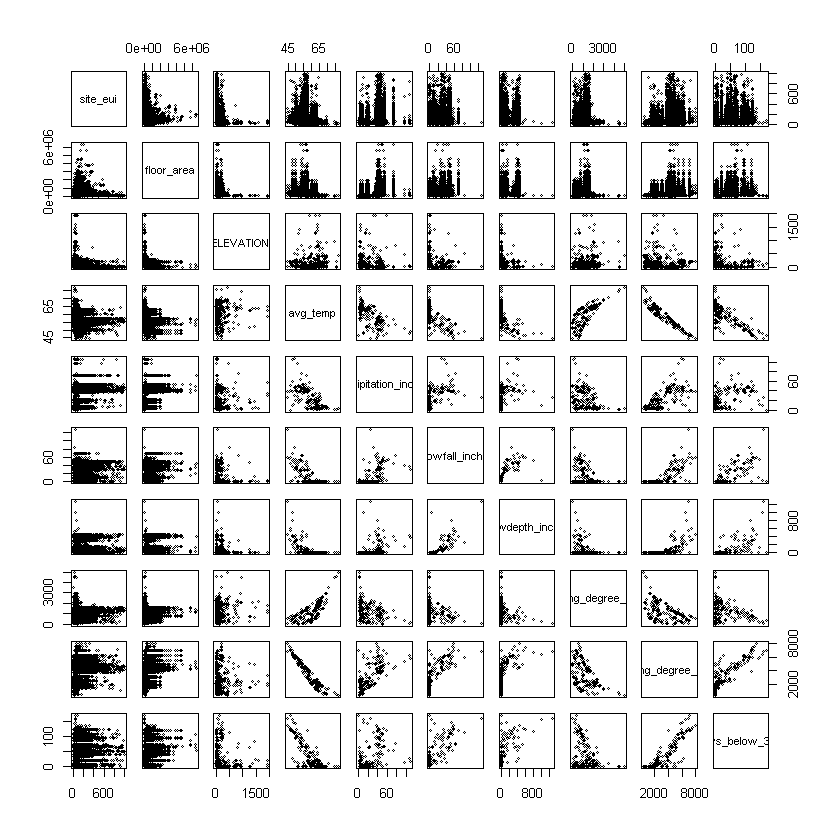

In [14]:
pairs(df_num1, cex=0.5)

## Dealing with NA values

From the above analysis we concluded that wind details have very low correlation with site_eui. Hence we decided to drop the columns-
1. containing wind direction and speed details and
2. days_with_fog

For the other two columns i.e, year_built and energy_star_rating, we will be filling the NA values with the median values based on the State and the building class variables.

The reason for choosing to not dropping energy star rating was that if a building has a higher enery star rating, it implies that it has better efficieny in energy consumption, which will inturn have an effect on the site energy use intensity.

Same goes for year built. Older buildings may have higher energy consumption due to outdated electrical wiring or appliances in working condition. Hence, this may affect the site EUI.

First to understand what are the median values, we group the data based on State_Factor and building_class and then identify the median values of energy star rating against each state number and building class.

In [15]:
df %>%
group_by(State_Factor, building_class) %>%
summarise(median(energy_star_rating, na.rm = TRUE), .groups = 'drop')

State_Factor,building_class,"median(energy_star_rating, na.rm = TRUE)"
State_1,Commercial,82.0
State_1,Residential,80.0
State_10,Commercial,84.5
State_11,Commercial,72.5
State_11,Residential,77.0
State_2,Commercial,70.0
State_2,Residential,60.0
State_4,Commercial,67.0
State_4,Residential,61.0
State_6,Commercial,71.0


Now, we are replacing the NA values by the median values and calculated below. First, we group the data based on State and building class, then mutate the values into the energy_star_rating and year_built columns using an ifelse() statement.

In [16]:
df_1 <- df %>% 
          group_by(State_Factor,building_class) %>% 
          mutate(energy_star_rating = ifelse(is.na(energy_star_rating), 
                            median(energy_star_rating, na.rm = TRUE), 
                            energy_star_rating)) %>%
          mutate(year_built = ifelse(is.na(year_built), 
                            median(year_built, na.rm = TRUE), 
                            year_built)) %>% ungroup()

In [17]:
summary(df_1$energy_star_rating)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00   56.00   61.00   62.28   79.00  100.00 

Further, we also wanted to check if replacing the NA values of energy_star_rating with the mean value made any difference in the median and mean values obtained for the whole column.

In [19]:
df_2 <- df %>% 
          group_by(State_Factor,building_class) %>% 
          mutate(energy_star_rating = ifelse(is.na(energy_star_rating), 
                            mean(energy_star_rating, na.rm = TRUE), 
                            energy_star_rating)) %>%
          mutate(year_built = ifelse(is.na(year_built), 
                            median(year_built, na.rm = TRUE), 
                            year_built)) %>%
        ungroup()

In [20]:
summary(df_2$energy_star_rating)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00   56.00   58.00   60.62   76.00  100.00 

for both ways of replacing the NA values in energy_star_rating we observe that the data is positively skewd. Therefore, we will first be using the df_2 dataframe for further analysis.

In [21]:
df_1 <- df_1%>%
select(-c(direction_max_wind_speed,direction_peak_wind_speed,
          max_wind_speed,days_with_fog))

Checking whether replacing the NA values had an effect on the correlation value between enery_star_rating and site_eui. 

In [22]:
df_num3 <- select(df_2, site_eui,energy_star_rating)

In [23]:
cor(df_num3)

,site_eui,energy_star_rating
site_eui,1.0000000,-0.3829763
energy_star_rating,-0.3829763,1.0000000


The correlation value between enery_star_rating and site_eui has come down from -0.48 to -0.38. Since, the correlation already is very low we considered the corrrelation of 0.38 for futher analysis.

## Dealing with Factor variables

We have three categorical variables in the dataset-
1. State_factor - details about the state in terms of a numerical index
2. building_class - whether a bulding is residential or commercial
3. facility_type - describing the type of facility.

First we will be dealing with the facility_type categorical variable.

Thsi has 60 different levels which will only increase the number of columns for our analysis.
Hence, by observation we see that close to 50% of the data consists of "Multifamily_Uncategorized" category followed by "Office_uncategorized" maing up 16%. Totally the two categories make up 66% of the data. Most of the data is either residetial categories or commerical/public buildings. 2to4_unit_buildings and 5plus_unit building are the other two residential buildings mentioned in the list of 60 categoires.
Thus, we have encoded the facility_type attribute into the following categories--
1. Multifamily_uncategorised
2. Office_uncategorised
3. 2plus_unit buildings
4. other commercial/public buildings
Here the encoding is done on the basis of (n-1) columns. Hence encoding is done for above mentioned columns 1-4. If all the rows consists of 0 then it describes other commercial/public buildings.

In [24]:
df_2 <- df_2 %>% 
    mutate(FT_multi_fam_uncat = ifelse(facility_type == 'Multifamily_Uncategorized',1,0)) %>%
    mutate(FT_office_uncat = ifelse(facility_type == 'Office_Uncategorized',1,0)) %>%
    mutate(FT_2plus_units_buildings = ifelse(facility_type == '2to4_Unit_Building' &
                                   facility_type == '5plus_Unit_Building',1,0))
## Rest all are commercial or public buildings.


Similarly, we are also encoding building_class and State_Fator variables.

In [25]:
df_2 <- df_2 %>%
mutate(building_class_code = ifelse(building_class == 'Residential',1,0))

To encode the State_Factor variables, we used a function called "vtreat" which automatically trains itself to encode a factor column and then applies it to the new test dataset, which is the same State_Factor column in this dataframe.

In [26]:
encd <- vtreat::designTreatmentsZ(df_2, "State_Factor")
sample_1 <- vtreat::prepare(encd, df_2, extracols = "target")
df_2 <- cbind(df_2,sample_1)

[1] "vtreat 1.6.3 inspecting inputs Sun Mar 06 21:02:04 2022"
[1] "designing treatments Sun Mar 06 21:02:04 2022"
[1] " have initial level statistics Sun Mar 06 21:02:04 2022"
[1] " scoring treatments Sun Mar 06 21:02:05 2022"
[1] "have treatment plan Sun Mar 06 21:02:05 2022"


## Developing a Linear Regression Model

Now that we have decided the columns to keep and dealt with rows with NA values, next, we will be generating a Linear regression model using the lm() function. which takes in a dataframe and a formula( which is identifying the dependent and independent variables)

Here the dependent variable is site_eui and the rest are the independent variables. Based on the p-value obtained from the liner regression, we will further identify the insignificant variables and eliminate them to try and improve the model for prediction of site_eui value.

In [28]:
df_3<- df_2 %>%
select(-c(direction_max_wind_speed,direction_peak_wind_speed,
          max_wind_speed,days_with_fog,id))

In [29]:
full_regression <- lm(formula = site_eui~.,data=df_3)
summary(full_regression)


Call:
lm(formula = site_eui ~ ., data = df_3)

Residuals:
    Min      1Q  Median      3Q     Max 
-315.58  -18.01   -2.57   11.57  906.89 

Coefficients: (13 not defined because of singularities)
                                                         Estimate Std. Error
(Intercept)                                             1.391e+03  1.376e+03
Year_Factor                                            -1.166e+00  1.923e+00
State_FactorState_10                                   -2.913e-01  2.427e+01
State_FactorState_11                                   -3.557e+01  1.640e+01
State_FactorState_2                                    -2.302e+01  2.283e+01
State_FactorState_4                                     5.625e+00  2.138e+01
State_FactorState_6                                     5.250e+00  1.900e+01
State_FactorState_8                                     5.246e+00  2.190e+01
building_classResidential                               9.162e+00  2.787e+00
facility_type5plus_Unit_Building

There is a coefficient error observed that mentions that there exists perfect linearity between a few variables. This is because of the encoded variable.

lm() automatically identifies the categorical variables and creates dummy encoding. Hence in the next iteration of regression model, we first remove the manually generated encoding colums and run the linear regression model. We will be using the df_1 data frame without the wind details columns and filled NA values for Energy start rating and Year built.

In [30]:
df_1<- df_1 %>%
select(-id)

In [31]:
full_regression_2 <- lm(data=df_1,formula=site_eui~.)
summary(full_regression_2)


Call:
lm(formula = site_eui ~ ., data = df_1)

Residuals:
    Min      1Q  Median      3Q     Max 
-316.97  -17.99   -2.67   11.31  907.32 

Coefficients: (1 not defined because of singularities)
                                                         Estimate Std. Error
(Intercept)                                             1.398e+03  1.377e+03
Year_Factor                                            -9.141e-01  1.924e+00
State_FactorState_10                                   -1.373e+00  2.428e+01
State_FactorState_11                                   -3.754e+01  1.641e+01
State_FactorState_2                                    -2.369e+01  2.285e+01
State_FactorState_4                                     7.629e+00  2.140e+01
State_FactorState_6                                     6.872e+00  1.902e+01
State_FactorState_8                                     4.680e+00  2.191e+01
building_classResidential                               8.213e+00  2.789e+00
facility_type5plus_Unit_Building 

This linear regression model has a R-square value of 0.3582 compared to the previous one which is 0.3592. It is observed that the following attributes have significance in the model, i.e, they are good predictors of site_eui-
1. most of the facility types
2. building_class Residential
3. april_avg_temp
4. floor_area
5. energy_star_rating
6. elevation
7. august_avg_temp
8. precipitation_inches

Considering only the above mentioned variables, we created another linear model to see if our model improves.

In [32]:
full_regression_3 <- lm(data=df_1,formula=site_eui~facility_type+floor_area+energy_star_rating
                       +ELEVATION+august_avg_temp+precipitation_inches+building_class+april_avg_temp)
summary(full_regression_3)


Call:
lm(formula = site_eui ~ facility_type + floor_area + energy_star_rating + 
    ELEVATION + august_avg_temp + precipitation_inches + building_class + 
    april_avg_temp, data = df_1)

Residuals:
    Min      1Q  Median      3Q     Max 
-312.87  -18.12   -2.84   11.36  911.94 

Coefficients: (1 not defined because of singularities)
                                                         Estimate Std. Error
(Intercept)                                             6.936e+01  7.192e+00
facility_type5plus_Unit_Building                        5.760e+00  1.701e+00
facility_typeCommercial_Other                           5.695e+01  1.581e+00
facility_typeCommercial_Unknown                         7.497e+01  4.956e+00
facility_typeData_Center                                2.938e+02  9.108e+00
facility_typeEducation_College_or_university            6.882e+01  1.839e+00
facility_typeEducation_Other_classroom                  2.343e+01  1.376e+00
facility_typeEducation_Preschool_or_daycare 

Now, it is observed that not all facility types are significant. 

In addition, the R-square value of the lm model has come down to 0.3519 from 0.3582. Although this is a reduction it not a very significant change.

The following attributes were removed to try and improve the linear model-
1. facility_typeFood_Service_Other
2. facility_typeLodging_Uncategorized
3. facility_typeMixed_Use_Predominantly_Residential
4. facility_typeReligious_worship
5. facility_typeService_Drycleaning_or_Laundry
6. facility_typeWarehouse_Nonrefrigerated

It is also observed that the building_class attribute is not significant. Hence we will remove it in the next iteration.

In [34]:
full_regression_4 <- lm(data=df_1,formula=site_eui~factor(facility_type, 
                                                          exclude=c('Food_Service_Other','Lodging_Uncategorized',
                        'Mixed_Use_Predominantly_Residential',
                        'Religious_worship',
                        'Service_Drycleaning_or_Laundry',
                        'Warehouse_Nonrefrigerated'))+floor_area+energy_star_rating
                       +ELEVATION+august_avg_temp+precipitation_inches+april_avg_temp)

The model now consists of all the significant variables. However, the R-square value has come down to 0.3439 from 0.3519.

To be able to read the above coefficient values, we used the broom function. (Unable to show the output in Markdown file due to formatting issue)

The Variance Inflation function, which indicated the multi-collinearity between variables was determined using the vif() function. 

In [ ]:
as.data.frame(vif(full_regression_4))

It is obseved that the vif values are well within 5. Hence, we will stop the iteration of the linear regression model and consider the above variables.

### Residual Plot

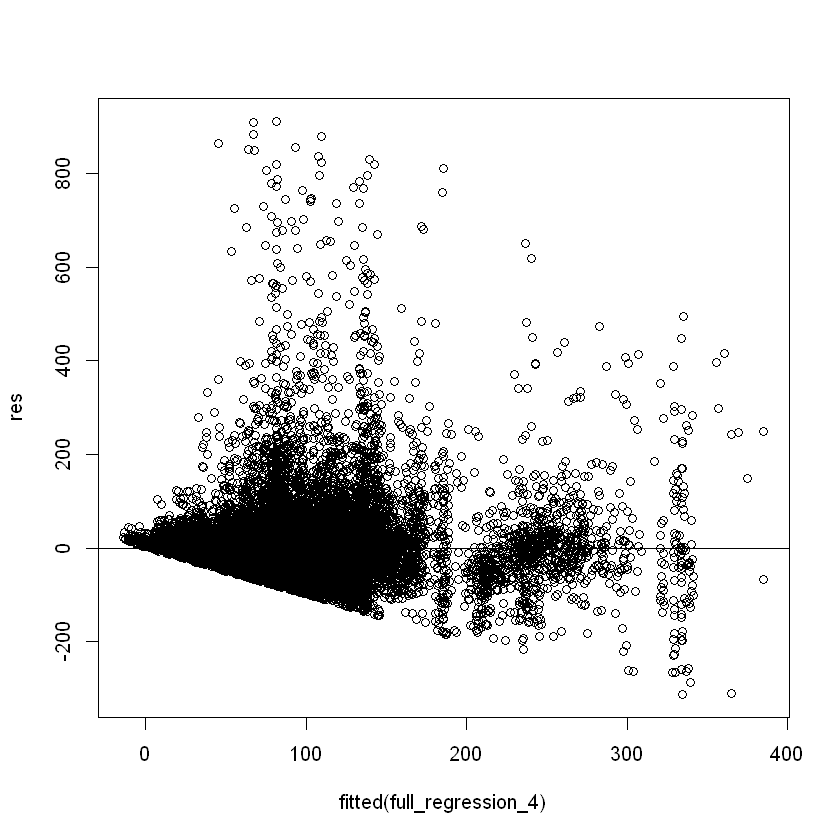

In [37]:
res <- resid(full_regression_4)
plot(fitted(full_regression_4), res)
abline(0,0)

Dispersion is low till 160 (approx), i.e below 160 range, predicted values are closely knit and also the overestimation and underestimation are more or less equal, but with few large residual values in the overestimation area. Above 160 range, there is higher dispersion and more of underestimation. Overall till predictive values of 250 or less, most of the residual values are in the range of -100 to +100 and looks symmetrical to origin line, which shows the prediction model to be fair. Also, equal distribution in four quadrants should not be looked for, because dependent variable is skewed towards the values less than 100 and this model is somewhat resembling the fact.

### Q-Q Plot

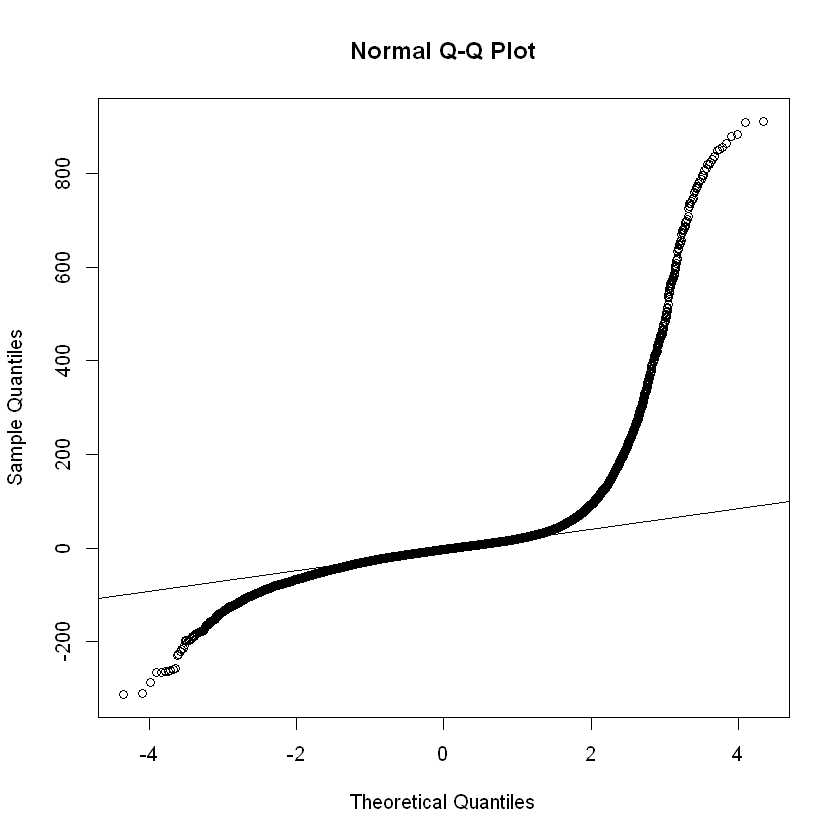

In [38]:
qqnorm(res)
qqline(res) 

It is a tailed QQ Plot which show that the normal distribution of data is too peaked in the middle, so the predicted values are not normal and highly skewed. Generally higher errors for higher predictive values.

# Predicting the Site_eui values in test dataset

Now that we have a linear regression equation, we will be using it to predict the site_eui values in the test dataset.

First, we will clean the data set to replace the NA values of energy_star_rating and Year_built. And, remove the wind and fog columns.

In [39]:
df_test <- read.csv('test.csv',stringsAsFactors = TRUE)

In [40]:
df_test <- df_test %>% 
          group_by(State_Factor,building_class) %>% 
          mutate(energy_star_rating = ifelse(is.na(energy_star_rating), 
                            median(energy_star_rating, na.rm = TRUE), 
                            energy_star_rating)) %>%
          mutate(year_built = ifelse(is.na(year_built), 
                            median(year_built, na.rm = TRUE), 
                            year_built)) %>% ungroup()

In [41]:
df_test<- df_test %>%
select(c(facility_type,april_avg_temp,floor_area,energy_star_rating,
         ELEVATION,august_avg_temp,precipitation_inches))

Now to predict the value of site_eui in the test dataset using the "full_regression_4" lm model generated previously.

In [42]:
predicted_values <- predict(full_regression_4, newdata = df_test)

In [43]:
summary(predicted_values)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 -14.35   45.09   67.23   71.44   90.47  378.11     250 

# Summary
For the assignment, the main objective was to predict the values for Site_eui from the given dataset. A predictive model was built using linear regression. Initially, we determined the columns with the highest number of NA values and identified their correlation with site_eui. Since, their correlation was very low, we decided to drop these variables.

Next, we replaced the NA values from energy_star_rating and year_built by their mean and median values respectively. We then encoded the factor variables. And finally genrated a Linear Regression model. Where we identified facility_type, floor_area, energy_star_rating, Elevation, august_avg_temp, april_avg_temp and precipitation_inches to be the significant independent variables to predict the values of site_eui. The model had a R-square value of 0.3434 and the VIF values of all the independent variables considered were below 5.

The type of facility, i.e, a commercial or residential building will have varying energy consumtions, especially in commercial buildings where consumption is generally considered to be high. The larger the size of the building, more will be the energy utilisation. Energy_start_rating which determines how efficiently a building consumes energy also has an impact on the EUI. The elevation of the building above the sea level, also impacts EUI. Higher the elevation reduces the EUI. Further, temperatures towards the end of winter and summer and beginning of spring and fall respectively also changes the energy requirements of the building. Especially with the advent of cold winds and requirements to maintain heating within the building, and increase in temperatures during the summer, will affect the site_eui. Finally, precipiation also results in drop in temperatures which has an impact on the EUI of the building.

Further analysis in order to improve the linear regression model would be to seperate the dataset based on commercial and residential buildings, later perform Linear regression. In addition, we can also identify the outliers in the dataset and remove them in order to improve the prediction.